In [1]:
from agente_viajero import AgenteViajero

cities = [
    (1,3), (2,5), (2,7), (4,2), (4,4), 
    (4,7), (4,8), (5,3), (6,1), (6,6), 
    (7,8), (8,2), (8,7), (9,3), (10,7), 
    (11,1), (11,4), (11,6), (12,7), (13,5),
]

av = AgenteViajero(cities, population_size=100, n_generations=100)
av.train()
av.result

,top_cities,top_route,top_dist
0,"[2, 4, 8, 3, 0, 6, 12, 17, 13, 14, 9, 15, 19, ...","[(2, 7), (4, 4), (6, 1), (4, 2), (1, 3), (4, 8...",79.095815
1,"[2, 4, 1, 5, 11, 10, 16, 18, 19, 15, 9, 14, 13...","[(2, 7), (4, 4), (2, 5), (4, 7), (8, 2), (7, 8...",76.356848
2,"[2, 4, 8, 3, 0, 6, 12, 17, 13, 14, 18, 19, 15,...","[(2, 7), (4, 4), (6, 1), (4, 2), (1, 3), (4, 8...",71.119750
3,"[15, 19, 18, 16, 11, 10, 5, 1, 4, 2, 9, 14, 13...","[(11, 1), (13, 5), (12, 7), (11, 4), (8, 2), (...",68.116736
4,"[2, 4, 8, 3, 0, 6, 10, 11, 15, 19, 18, 14, 12,...","[(2, 7), (4, 4), (6, 1), (4, 2), (1, 3), (4, 8...",64.452752
...,...,...,...
95,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(1, 3), (2, 5), (2, 7), (4, 8), (4, 7), (6, 6...",37.788039
96,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(1, 3), (2, 5), (2, 7), (4, 8), (4, 7), (6, 6...",37.202252
97,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(1, 3), (2, 5), (2, 7), (4, 8), (4, 7), (6, 6...",37.788039
98,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(1, 3), (2, 5), (2, 7), (4, 8), (4, 7), (6, 6...",37.202252


In [5]:
to_route = av.result['top_cities'][99]
new_route = [(to_route[i], to_route[i+1]) for _, i in zip(to_route, range(len(to_route)-1))]

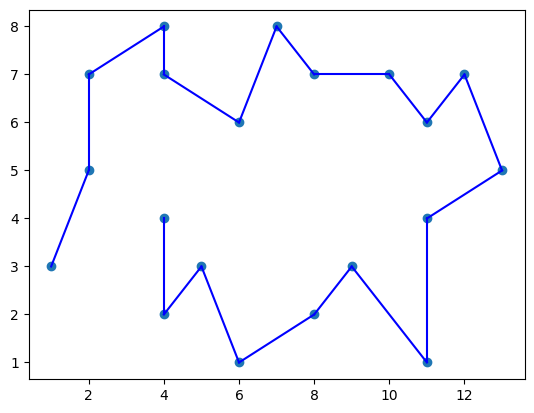

In [9]:
from matplotlib.pyplot import axes, scatter, plot, show

x, y = [*zip(*cities)]

ax = axes()
ax.scatter(x,y)

def connectpoints(x, y, point):
    x1, x2 = x[point[0]], x[point[-1]]
    y1, y2 = y[point[0]], y[point[-1]]
    plot([x1, x2],[y1, y2], c='blue')

for city in new_route:
    connectpoints(x, y, city)

show()